In [ ]:
!pip install networkx
!pip install ogb

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./edges.csv', header=None)
df.head()

C:\Users\15723\AppData\Local\Temp\ipykernel_60232\857153621.py:5: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./edges.csv', header=None)


,0,1
0,source,target
1,1,15017
2,4,20524
3,10,11299
4,15,21801


In [2]:
# 将数据转换为列表，元素为元组
edge_list = [row for row in df.itertuples(index=False, name=None)]
# 去除标题
edge_list = edge_list[1:]

In [3]:
# 去重
edge_list = list(set(edge_list))
# 按边起点从小到大排序
edge_list = sorted(edge_list, key=lambda x: (int(x[0]), int(x[1])))
edge_list[:10]

[('1', '15017'),
 ('4', '20524'),
 ('10', '11299'),
 ('15', '21801'),
 ('18', '196170'),
 ('23', '19795'),
 ('33', '2244'),
 ('39', '92313'),
 ('48', '82123'),
 ('56', '20603')]

<Figure size 1800x1400 with 0 Axes>

Text(0.5, 1.0, 'Graph Visualization')

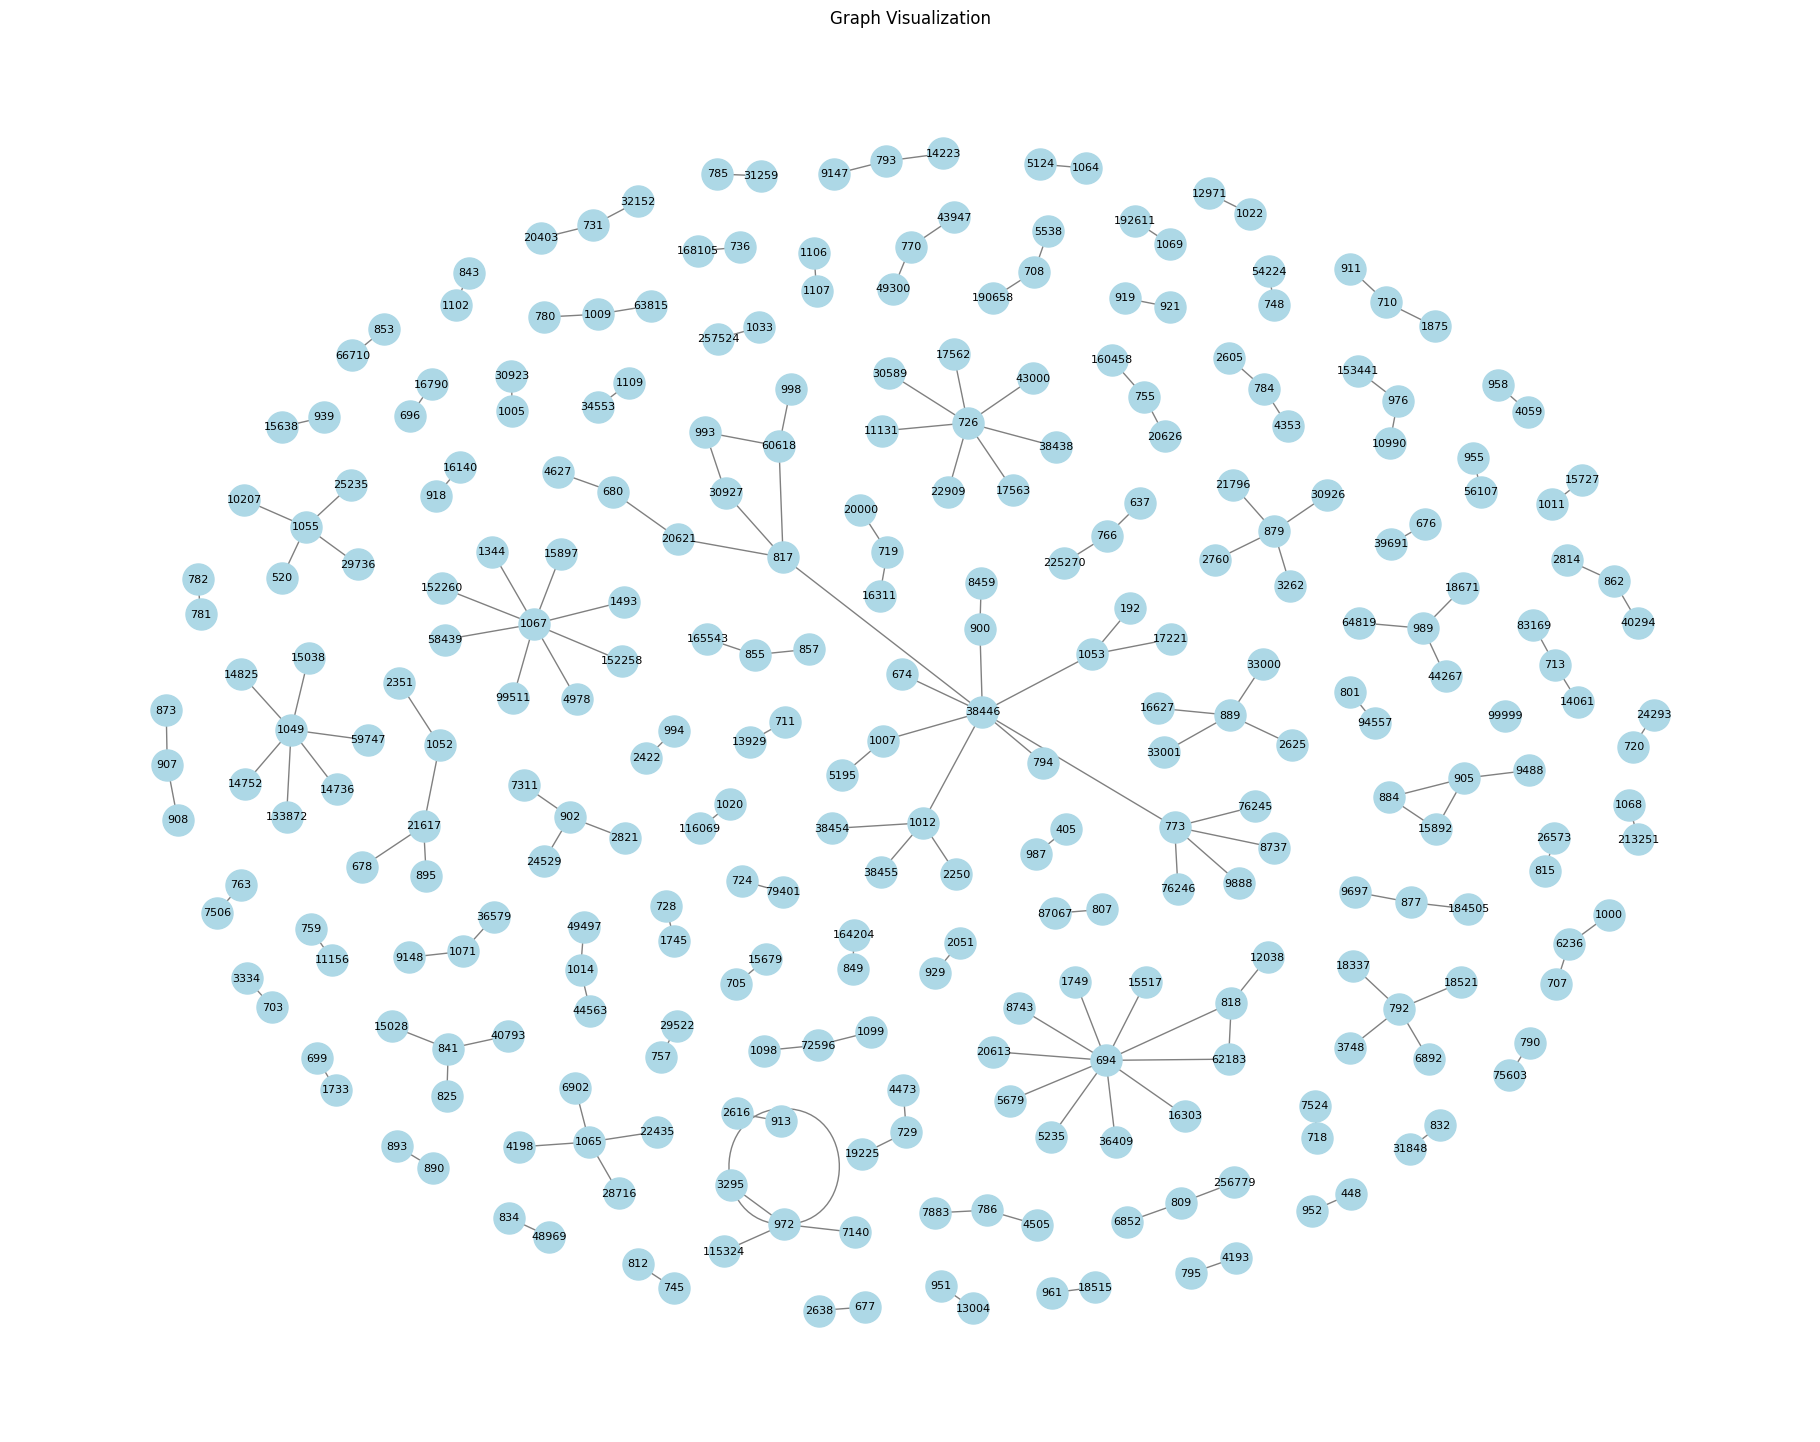

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建图对象，画前两百条边
G = nx.Graph(edge_list[200:400])
# 画孤立结点
isolated_nodes = [99999]
G.add_nodes_from(isolated_nodes)

# 画布大小
plt.figure(figsize=(18, 14))
# 设置节点分布
pos = nx.forceatlas2_layout(G, scaling_ratio=2.0, strong_gravity=True, seed=47)
# 图属性
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_color='black', edge_color='gray')

# 显示图形
plt.title("Graph Visualization")
plt.show()

In [7]:
# ogbn-arxiv dataset visualization

In [22]:
from ogb.nodeproppred import NodePropPredDataset

dataset_name = 'ogbn-arxiv'
dataset = NodePropPredDataset(name = dataset_name)
graph, label = dataset[0] # graph: library-agnostic graph object

D:\anaconda\envs\graph\lib\site-packages\ogb\nodeproppred\dataset.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_dict = torch.load(pre_processed_file_path)


In [23]:
edge_list = list(zip(graph["edge_index"][0], graph["edge_index"][1]))  # 配对起点和终点
sorted_list = sorted(edge_list, key=lambda x: x[0])
sorted_list[:10]

[(np.int64(0), np.int64(93487)),
 (np.int64(0), np.int64(52893)),
 (np.int64(1), np.int64(141692)),
 (np.int64(2), np.int64(168209)),
 (np.int64(2), np.int64(18735)),
 (np.int64(2), np.int64(119218)),
 (np.int64(2), np.int64(22689)),
 (np.int64(2), np.int64(50646)),
 (np.int64(2), np.int64(158293)),
 (np.int64(2), np.int64(80266))]

<Figure size 1800x1400 with 0 Axes>

Text(0.5, 1.0, 'Graph Visualization')

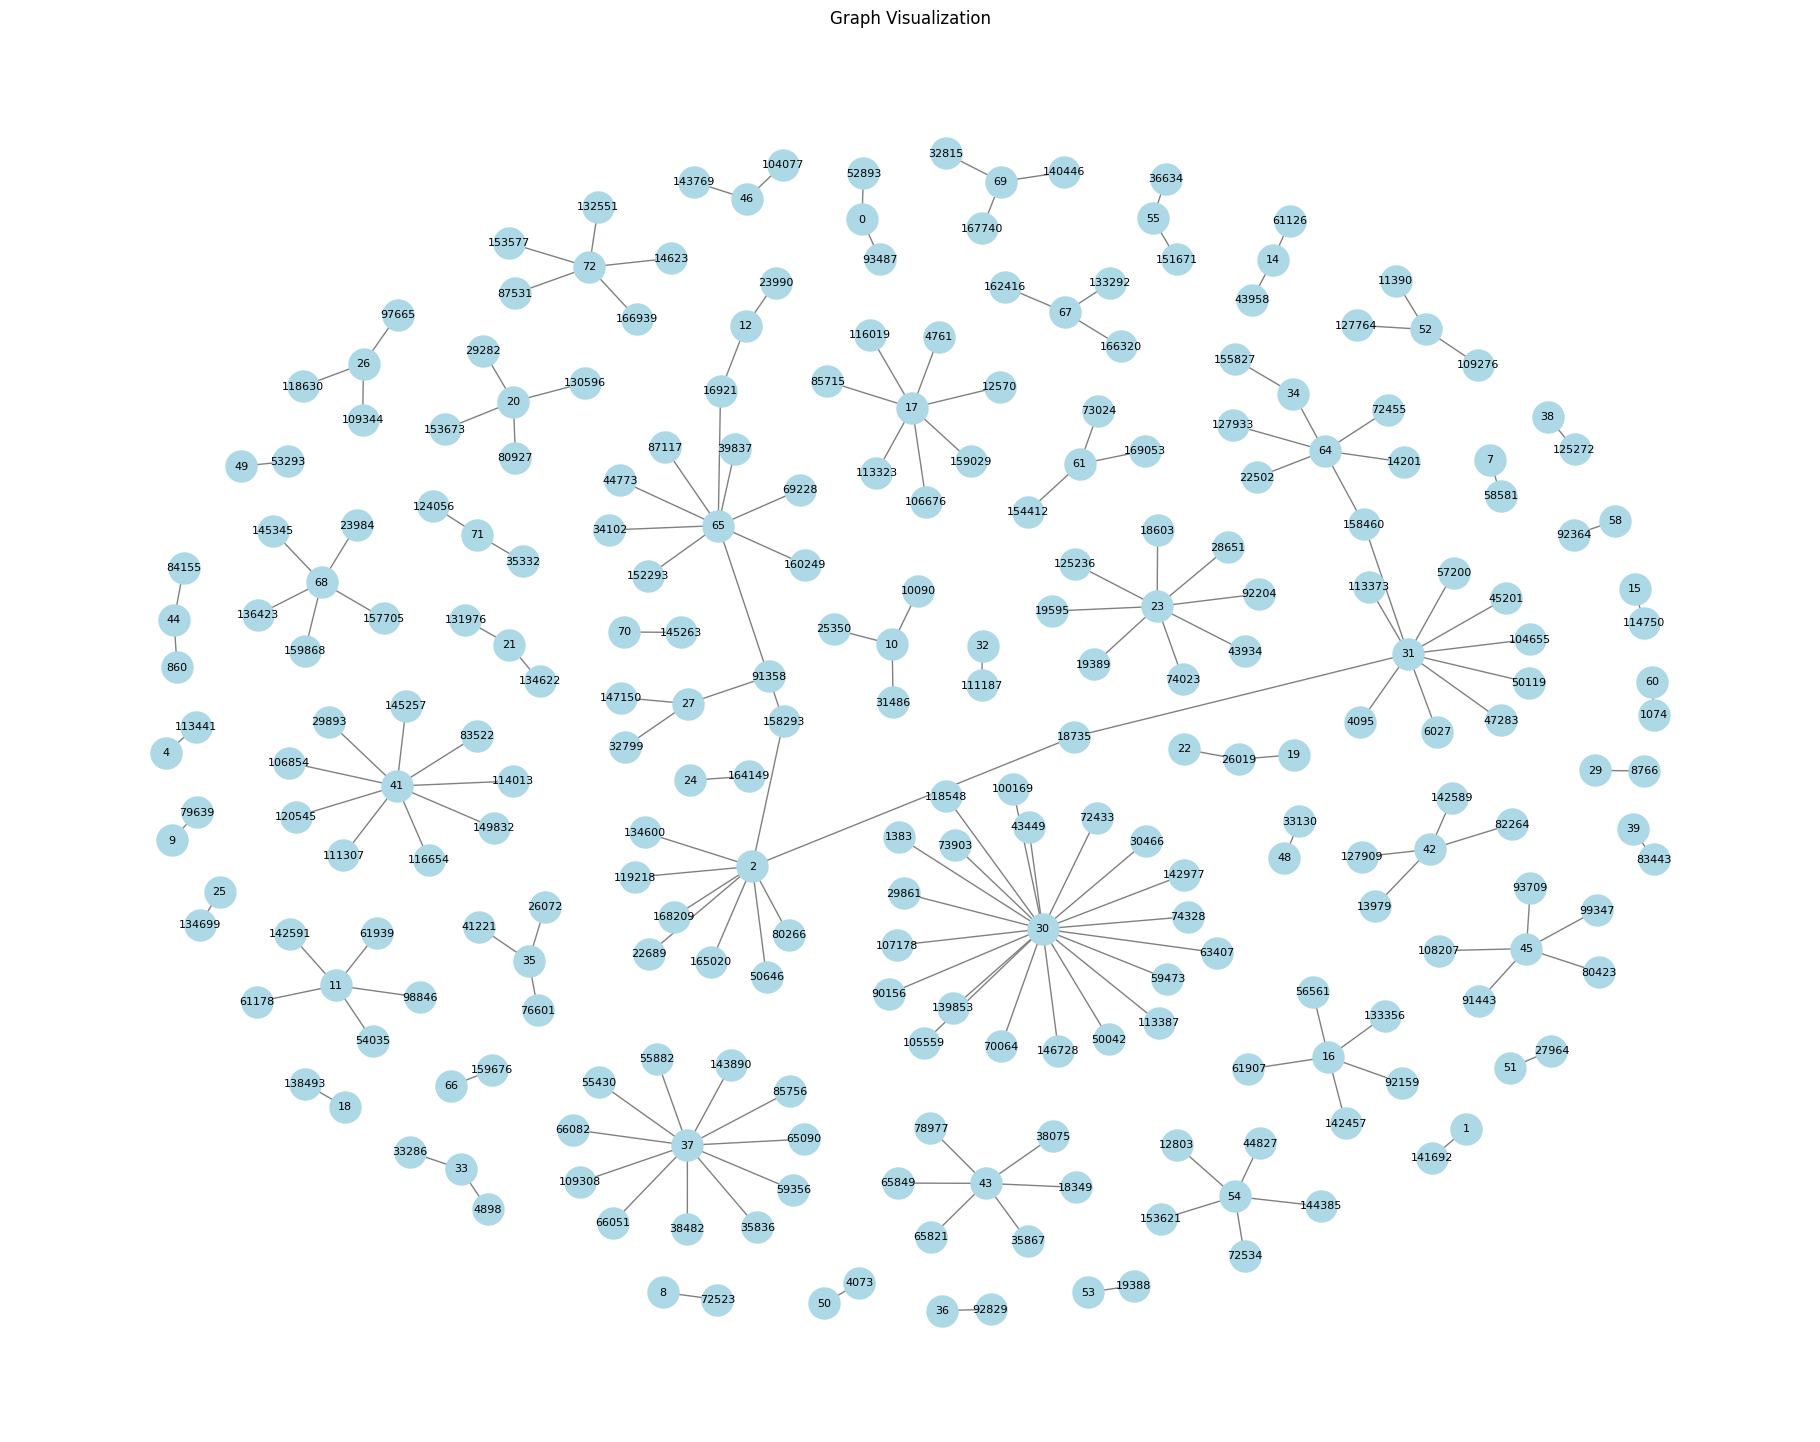

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建图对象
G = nx.Graph(sorted_list[:200])

# 绘制图形
plt.figure(figsize=(18, 14))
pos = nx.pos = nx.forceatlas2_layout(G, scaling_ratio=2.0, strong_gravity=True, seed=47)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_color='black', edge_color='gray')

# 显示图形
plt.title("Graph Visualization")
plt.show()